## PYTHON TUTORIAL CLASS

### Python program for analyzing the annual cycle in 2020 of Aerosol Optical Depth from AERONET and comparing with the CAMS global reanalysis data.

In [1]:
%matplotlib inline
import os
import xarray as xr
import numpy as np
import netCDF4 as nc
import pandas as pd

from IPython.display import HTML

import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib.cm import get_cmap
from matplotlib import animation
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

import wget

import warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

In [2]:
%run functions.ipynb

### Select latitude / longitude values for station - `Santa Cruz, Tenerife`

In [3]:
lat = 28.473
lon = -16.247

### Download and plot time-series of AERONET data

As a first step, let us create a Python dictionary in which we store all the parameters we would like to use for the request as dictionary keys. You can initiate a dictionary with curled brackets `{}`. Below, we specify the following parameters:
* `endpoint`: Endpoint of the AERONET web service
* `station`: Name of the AERONET station
* `year`: year 1 of interest
* `month`: month 1 of interest
* `day`: day 1 of interest
* `year2`: year 2 of interest
* `month2`: month 2 of interest
* `day2`: day 2 of interest
* `AOD15`: data type, other options include `AOD10`, `AOD20`, etc.
* `AVG`: data format, `AVG=10` - all points, `AVG=20` - daily averages

The keywords below are those we will need for requesting daily averaged observations of Aerosol Optical Depth Level 1.5 data for the station Santa Cruz, Tenerife from 1 January to 31 December 2020.

In [4]:
# fill in the keyword
data_dict = {
    'endpoint': 'https://aeronet.gsfc.nasa.gov/cgi-bin/print_web_data_v3',
    'station':'Santa_Cruz_Tenerife',
    'year': 2020,
    'month': 1,
    'day': 1,
    'year2': 2020,
    'month2': 12,
    'day2': 31,
    'AOD15': 1,
    'AVG': 20
}


In a next step, we construct the final string for the wget request with the `format` function. You construct a string by adding the dictionary keys in curled brackets. At the end of the string, you provide the dictionary key informatoin to the string with the `format()` function. A print of the resulting url shows, that the format function replaced the information in the curled brackets with the data in the dictionary.

In [5]:
url = '{endpoint}?site={station}&year={year}&month={month}&day={day}&year2={year2}&month2={month2}&day2={day2}&AOD15={AOD15}&AVG={AVG}'.format(**data_dict)
url

'https://aeronet.gsfc.nasa.gov/cgi-bin/print_web_data_v3?site=Santa_Cruz_Tenerife&year=2020&month=1&day=1&year2=2020&month2=12&day2=31&AOD15=1&AVG=20'

Now we are ready to request the data with the function download() from the wget Python library. You have to pass to the function the constructed url above together with a file path of where the downloaded that shall be stored. Let us store the data as txt file in the folder C:/Users/dayo/Desktop/data_jupyter/.

In [6]:
#wget.download(url, 'C:/Users/dayo/Desktop/data_jupyter/2020_santa_cruz_tenerife_20.txt')

Now that the data (.txt) is downloaded, its time to load it in the jupyter notebook through **panda package**

In [7]:
# load the .txt data into the dataframe using .read_table()
df = pd.read_table('2020_santa_cruz_tenerife_20.txt', delimiter=',', header=[7], index_col=1)
df

,AERONET_Site,Time(hh:mm:ss),Day_of_Year,AOD_1640nm,AOD_1020nm,AOD_870nm,AOD_865nm,AOD_779nm,AOD_675nm,AOD_667nm,...,N[440-675_Angstrom_Exponent],N[500-870_Angstrom_Exponent],N[340-440_Angstrom_Exponent],N[440-675_Angstrom_Exponent[Polar]],Data_Quality_Level,AERONET_Instrument_Number,AERONET_Site_Name,Site_Latitude(Degrees),Site_Longitude(Degrees),Site_Elevation(m)<br>
Date(dd:mm:yyyy),,,,,,,,,,,,,,,,,,,,,
01:01:2020,Santa_Cruz_Tenerife,12:00:00,1.0,0.061198,0.076232,0.080599,-999.0,-999.0,0.085592,-999.0,...,87.0,87.0,87.0,0.0,lev15,1090.0,Santa_Cruz_Tenerife,28.472528,-16.247361,52.000000<br>
03:01:2020,Santa_Cruz_Tenerife,12:00:00,3.0,0.039688,0.052219,0.056409,-999.0,-999.0,0.063661,-999.0,...,131.0,131.0,131.0,0.0,lev15,1090.0,Santa_Cruz_Tenerife,28.472528,-16.247361,52.000000<br>
04:01:2020,Santa_Cruz_Tenerife,12:00:00,4.0,0.046246,0.058887,0.063752,-999.0,-999.0,0.073848,-999.0,...,39.0,39.0,39.0,0.0,lev15,1090.0,Santa_Cruz_Tenerife,28.472528,-16.247361,52.000000<br>
05:01:2020,Santa_Cruz_Tenerife,12:00:00,5.0,0.039780,0.050607,0.055417,-999.0,-999.0,0.065148,-999.0,...,59.0,59.0,58.0,0.0,lev15,1090.0,Santa_Cruz_Tenerife,28.472528,-16.247361,52.000000<br>
06:01:2020,Santa_Cruz_Tenerife,12:00:00,6.0,0.025086,0.033686,0.037128,-999.0,-999.0,0.042951,-999.0,...,33.0,33.0,32.0,0.0,lev15,1090.0,Santa_Cruz_Tenerife,28.472528,-16.247361,52.000000<br>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28:12:2020,Santa_Cruz_Tenerife,12:00:00,363.0,0.281631,0.361706,0.378314,-999.0,-999.0,0.398796,-999.0,...,95.0,95.0,95.0,0.0,lev15,1090.0,Santa_Cruz_Tenerife,28.472528,-16.247361,52.000000<br>
29:12:2020,Santa_Cruz_Tenerife,12:00:00,364.0,0.225135,0.279970,0.290588,-999.0,-999.0,0.304814,-999.0,...,35.0,35.0,35.0,0.0,lev15,1090.0,Santa_Cruz_Tenerife,28.472528,-16.247361,52.000000<br>
30:12:2020,Santa_Cruz_Tenerife,12:00:00,365.0,0.055233,0.075359,0.079524,-999.0,-999.0,0.086272,-999.0,...,34.0,34.0,34.0,0.0,lev15,1090.0,Santa_Cruz_Tenerife,28.472528,-16.247361,52.000000<br>


In [8]:
# drop the NaN entires for the last row with the function .dropna()
df = df.dropna()

# replace the entries with -999.0 and set them as NaN using the function .replace()
df = df.replace(-999.0, np.nan)
df

,AERONET_Site,Time(hh:mm:ss),Day_of_Year,AOD_1640nm,AOD_1020nm,AOD_870nm,AOD_865nm,AOD_779nm,AOD_675nm,AOD_667nm,...,N[440-675_Angstrom_Exponent],N[500-870_Angstrom_Exponent],N[340-440_Angstrom_Exponent],N[440-675_Angstrom_Exponent[Polar]],Data_Quality_Level,AERONET_Instrument_Number,AERONET_Site_Name,Site_Latitude(Degrees),Site_Longitude(Degrees),Site_Elevation(m)<br>
Date(dd:mm:yyyy),,,,,,,,,,,,,,,,,,,,,
01:01:2020,Santa_Cruz_Tenerife,12:00:00,1.0,0.061198,0.076232,0.080599,NaN,NaN,0.085592,NaN,...,87.0,87.0,87.0,0.0,lev15,1090.0,Santa_Cruz_Tenerife,28.472528,-16.247361,52.000000<br>
03:01:2020,Santa_Cruz_Tenerife,12:00:00,3.0,0.039688,0.052219,0.056409,NaN,NaN,0.063661,NaN,...,131.0,131.0,131.0,0.0,lev15,1090.0,Santa_Cruz_Tenerife,28.472528,-16.247361,52.000000<br>
04:01:2020,Santa_Cruz_Tenerife,12:00:00,4.0,0.046246,0.058887,0.063752,NaN,NaN,0.073848,NaN,...,39.0,39.0,39.0,0.0,lev15,1090.0,Santa_Cruz_Tenerife,28.472528,-16.247361,52.000000<br>
05:01:2020,Santa_Cruz_Tenerife,12:00:00,5.0,0.039780,0.050607,0.055417,NaN,NaN,0.065148,NaN,...,59.0,59.0,58.0,0.0,lev15,1090.0,Santa_Cruz_Tenerife,28.472528,-16.247361,52.000000<br>
06:01:2020,Santa_Cruz_Tenerife,12:00:00,6.0,0.025086,0.033686,0.037128,NaN,NaN,0.042951,NaN,...,33.0,33.0,32.0,0.0,lev15,1090.0,Santa_Cruz_Tenerife,28.472528,-16.247361,52.000000<br>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27:12:2020,Santa_Cruz_Tenerife,12:00:00,362.0,0.087975,0.114314,0.119534,NaN,NaN,0.125963,NaN,...,80.0,80.0,80.0,0.0,lev15,1090.0,Santa_Cruz_Tenerife,28.472528,-16.247361,52.000000<br>
28:12:2020,Santa_Cruz_Tenerife,12:00:00,363.0,0.281631,0.361706,0.378314,NaN,NaN,0.398796,NaN,...,95.0,95.0,95.0,0.0,lev15,1090.0,Santa_Cruz_Tenerife,28.472528,-16.247361,52.000000<br>
29:12:2020,Santa_Cruz_Tenerife,12:00:00,364.0,0.225135,0.279970,0.290588,NaN,NaN,0.304814,NaN,...,35.0,35.0,35.0,0.0,lev15,1090.0,Santa_Cruz_Tenerife,28.472528,-16.247361,52.000000<br>


Let us now convert the index entry to a `DateTimeIndex` format with the function `to_datetime()`. Important here, you have to specify the format of the index string: `%d:%m:%Y`.

You see below that we do not have observations for every day. E.g on 2 January 2020, the data frame does not list any entry.

In [9]:
# convert the index entry to a DateTimeIndex format with the function to_datetime()
df.index = pd.to_datetime(df.index, format = '%d:%m:%Y')
df.head(5)

,AERONET_Site,Time(hh:mm:ss),Day_of_Year,AOD_1640nm,AOD_1020nm,AOD_870nm,AOD_865nm,AOD_779nm,AOD_675nm,AOD_667nm,...,N[440-675_Angstrom_Exponent],N[500-870_Angstrom_Exponent],N[340-440_Angstrom_Exponent],N[440-675_Angstrom_Exponent[Polar]],Data_Quality_Level,AERONET_Instrument_Number,AERONET_Site_Name,Site_Latitude(Degrees),Site_Longitude(Degrees),Site_Elevation(m)<br>
Date(dd:mm:yyyy),,,,,,,,,,,,,,,,,,,,,
2020-01-01,Santa_Cruz_Tenerife,12:00:00,1.0,0.061198,0.076232,0.080599,NaN,NaN,0.085592,NaN,...,87.0,87.0,87.0,0.0,lev15,1090.0,Santa_Cruz_Tenerife,28.472528,-16.247361,52.000000<br>
2020-01-03,Santa_Cruz_Tenerife,12:00:00,3.0,0.039688,0.052219,0.056409,NaN,NaN,0.063661,NaN,...,131.0,131.0,131.0,0.0,lev15,1090.0,Santa_Cruz_Tenerife,28.472528,-16.247361,52.000000<br>
2020-01-04,Santa_Cruz_Tenerife,12:00:00,4.0,0.046246,0.058887,0.063752,NaN,NaN,0.073848,NaN,...,39.0,39.0,39.0,0.0,lev15,1090.0,Santa_Cruz_Tenerife,28.472528,-16.247361,52.000000<br>
2020-01-05,Santa_Cruz_Tenerife,12:00:00,5.0,0.039780,0.050607,0.055417,NaN,NaN,0.065148,NaN,...,59.0,59.0,58.0,0.0,lev15,1090.0,Santa_Cruz_Tenerife,28.472528,-16.247361,52.000000<br>
2020-01-06,Santa_Cruz_Tenerife,12:00:00,6.0,0.025086,0.033686,0.037128,NaN,NaN,0.042951,NaN,...,33.0,33.0,32.0,0.0,lev15,1090.0,Santa_Cruz_Tenerife,28.472528,-16.247361,52.000000<br>


We can now plot the column `AOD_500nm` as annual time-series. You see that the station `Santa Cruz, Tenerife` was affected by other dust events later in 2020.

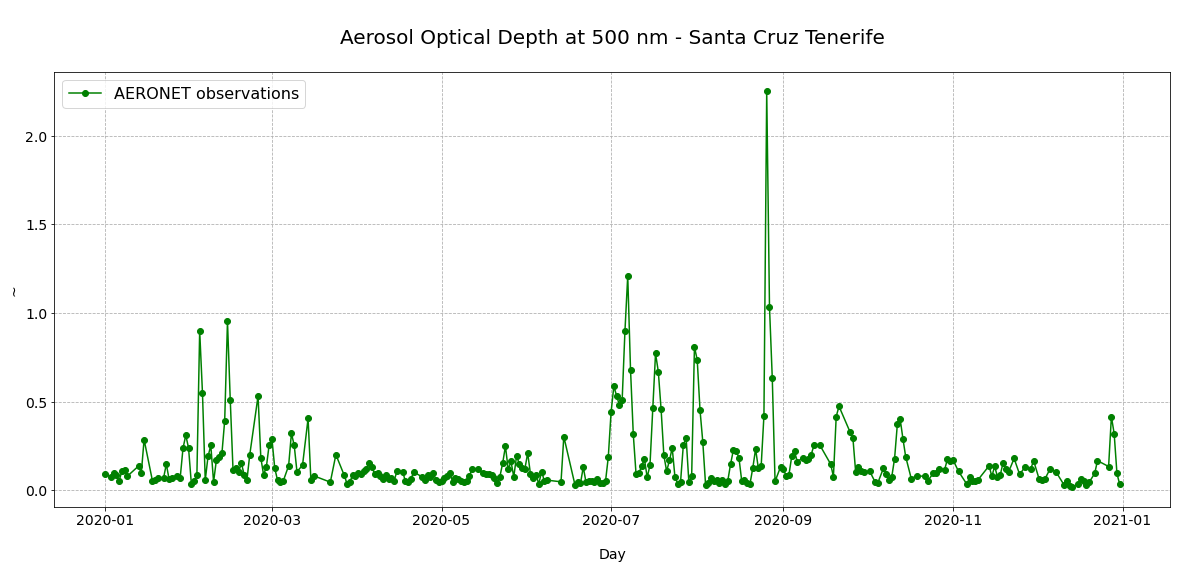

In [10]:
# Initiate a figure
fig = plt.figure(figsize=(20,8))
ax = plt.subplot()

# Define the plotting function
ax.plot(df.AOD_500nm, 'o-', color='green', label='AERONET observations')

# Customize the title and axes lables
ax.set_title('\nAerosol Optical Depth at 500 nm - Santa Cruz Tenerife\n', fontsize=20)
ax.set_ylabel('~', fontsize=14)
ax.set_xlabel('\nDay', fontsize=14)

# Customize the fontsize of the axes tickes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add a gridline to the plot
ax.grid(linestyle='--')

plt.legend(fontsize=16, loc=2)


**QUESTION:** 
* Determine if the strong increase of AOD at the end of August 2020 was because of dust?

**ANSWER:** 
* To do this, we will make use of use the `Angstrom Exponent` as it gives us an indication of the particle size. The condition is, if the `Angstrom Exponent` is below 0.6, then it is an indication that the increase of AOD is caused by coarser dust particles.

**Now, let us visualize the AOD at 500nm for 2020 together with the `Angstrom Exponent 440-675nm`.**

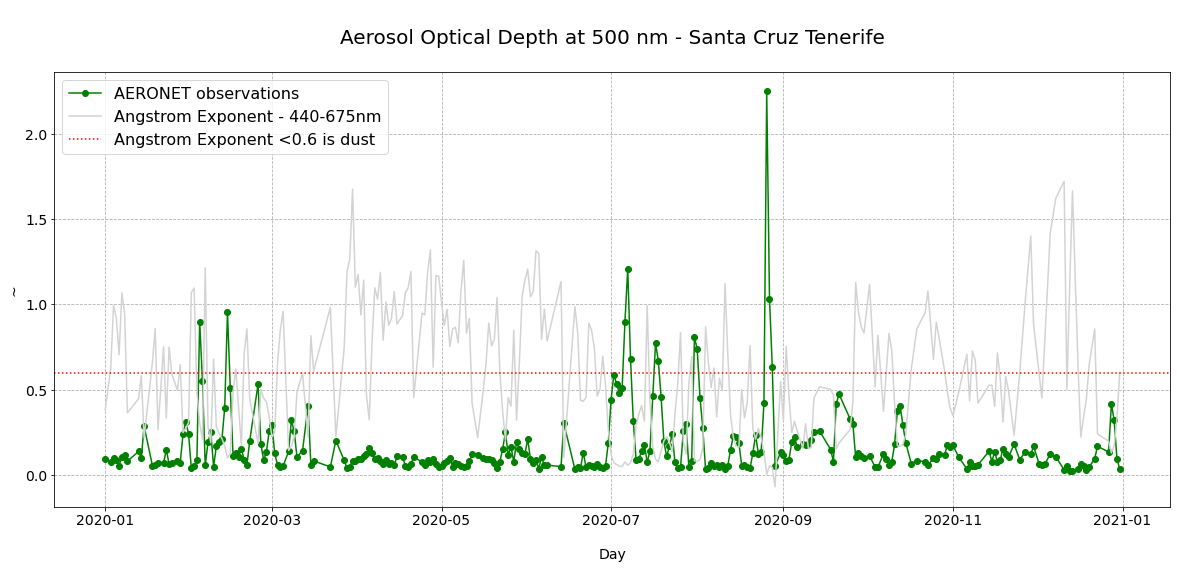

In [11]:
# Initiate a figure
fig = plt.figure(figsize=(20,8))
ax = plt.subplot()

# Define the plotting function
ax.plot(df.AOD_500nm, 'o-', color='green', label='AERONET observations')
ax.plot(df['440-675_Angstrom_Exponent'], '-', color='lightgrey', label='Angstrom Exponent - 440-675nm')

plt.axhline(y=0.6, color='r', linestyle='dotted', label='Angstrom Exponent <0.6 is dust')

# Customize the title and axes lables
ax.set_title('\nAerosol Optical Depth at 500 nm - Santa Cruz Tenerife\n', fontsize=20)
ax.set_ylabel('~', fontsize=14)
ax.set_xlabel('\nDay', fontsize=14)

# Customize the fontsize of the axes tickes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add a gridline to the plot
ax.grid(linestyle='--')

plt.legend(fontsize=16, loc=2)

Above, you see that the Angstrom Exponent during the high AOD values at the end of August is very low. Hence, we could interpret this event as a strong dust intrusion. But is this really the case? You can also check [here](https://sds-was.aemet.es/forecast-products/dust-observations/msg-2013-eumetsat) the MSG SEVIRI Dust RGB for e.g. 26 August 2020 and [here](https://worldview.earthdata.nasa.gov/?v=-39.451155087380556,13.025874527486357,5.067364489712844,36.350274677008436&l=Reference_Labels_15m(hidden),Reference_Features_15m(hidden),Coastlines_15m,MODIS_Aqua_CorrectedReflectance_TrueColor(hidden),MODIS_Terra_CorrectedReflectance_TrueColor&lg=false&t=2020-08-26-T00%3A00%3A00Z) the MODIS RGB to better understand the event and what could have caused the high AOD values.

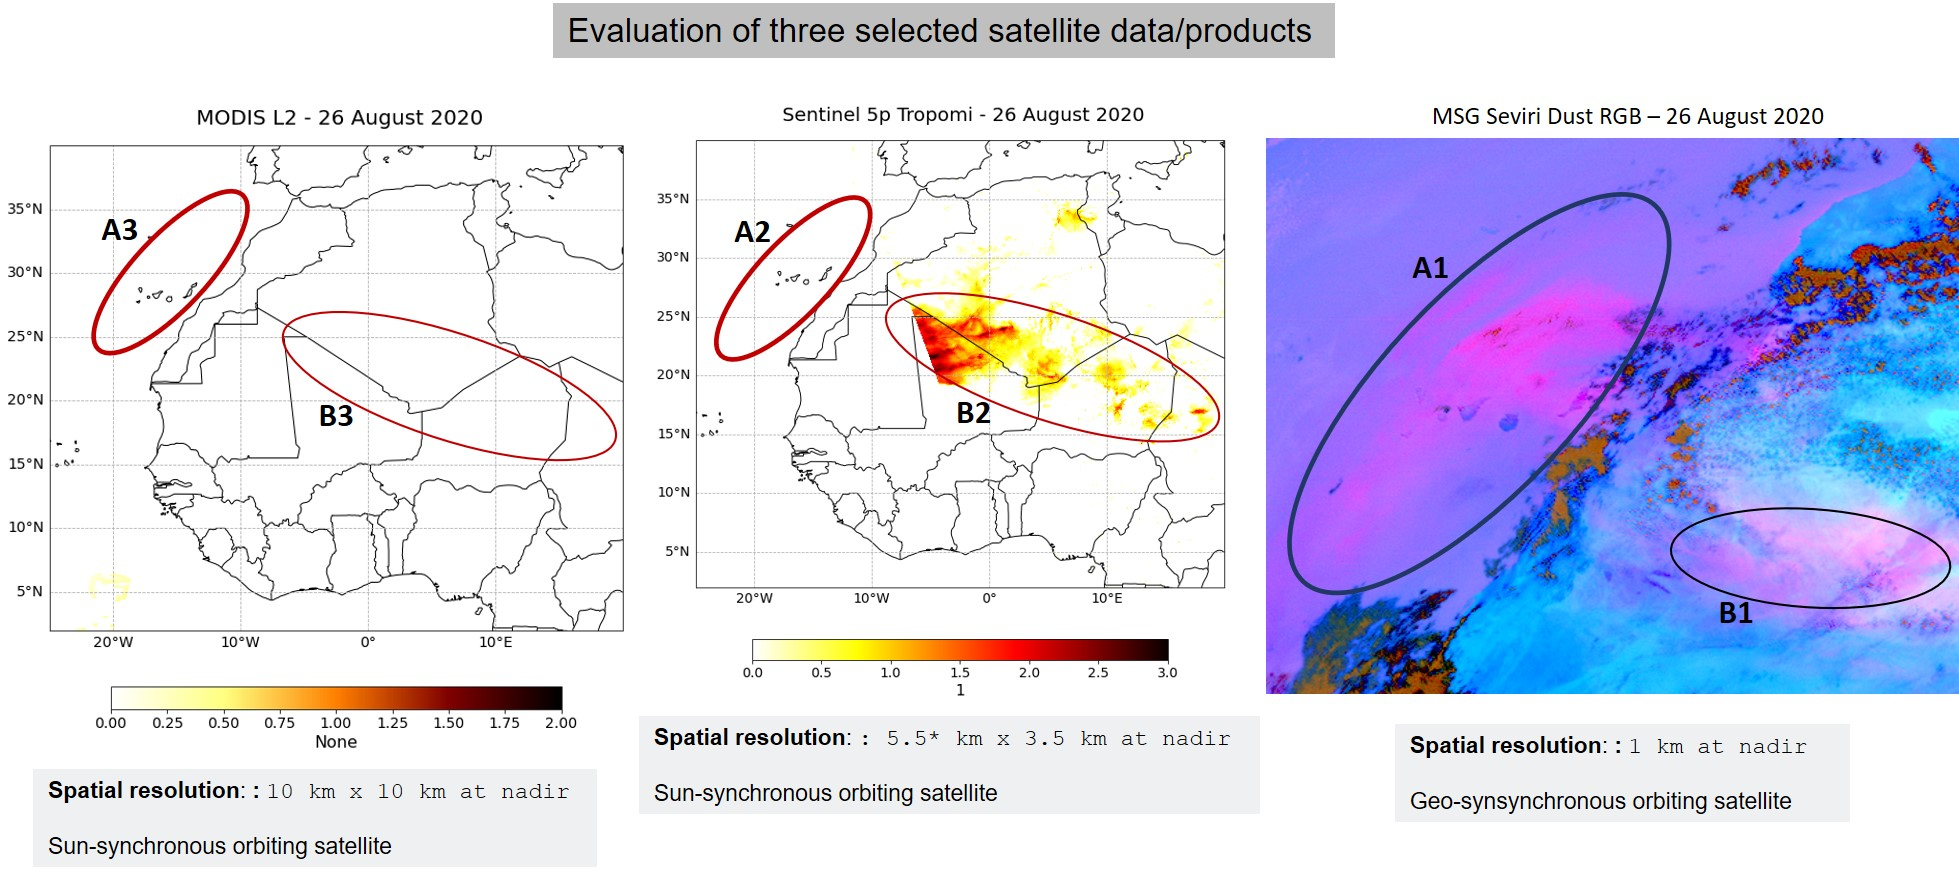

**INFERENCE**
* From the satellite imeges above, only MSG SEVIRI Dust RGB composite with a finer resolution of 1km confirmed that the aerosol observed at Santa Cruz Tenerife on the 26th of August 2020 through the AERONET observation was indeed a `dust event`

Now that we have double confirmation (`Angstrom Exponent` and `MSG Dust RGB `) that the `aerosol` captured by `AERONET` at the  Santa Cruz station, Tenerife was a dust event, **let's download CAMS global reanalysis (EAC4) and select 2020 time-series**.

First, we have to download the `CAMS global reanalysis (EAC4)` from the [Copernicus Atmosphere Data Store](https://ads.atmosphere.copernicus.eu/cdsapp#!/dataset/cams-global-reanalysis-eac4?tab=form) with the following specifications:
* Variable on single levels: `Dust aerosol optical depth at 550 nm`
* Date: `Start=2020-01-01`, `End=2020-12-31`
* Time: `[00:00, 03:00, 06:00, 09:00, 12:00, 15:00, 18:00, 21:00]`
* Restricted area: `N: 30., W: -20, E: 14, S: 20.`
* Format: `netCDF`

See `CDSAPI` request below.

In [15]:
URL='https://ads.atmosphere.copernicus.eu/api/v2'
KEY='3827:82bd21a0-5941-4769-b701-dc143fa4712a'

In [18]:
#import cdsapi

c = cdsapi.Client(url=URL, key=KEY)

c.retrieve(
    'cams-global-reanalysis-eac4',
    {
        'variable': 'dust_aerosol_optical_depth_550nm',
        'date': '2020-01-01/2020-12-31',
        'time': [
            '00:00', '03:00', '06:00',
            '09:00', '12:00', '15:00',
            '18:00', '21:00',
        ],
        'area': [
            30, -20, 20,
            15,
        ],
        'format': 'netcdf',
    },
    'C:/Users/dayo/Desktop/data_jupyter/2020_dustAOD_cams_eac4.nc')

2022-01-15 19:03:19,795 INFO Sending request to https://ads.atmosphere.copernicus.eu/api/v2/resources/cams-global-reanalysis-eac4
C:\Users\dayo\py39\envs\model_env\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ads.atmosphere.copernicus.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
2022-01-15 19:03:20,350 INFO Request is queued
C:\Users\dayo\py39\envs\model_env\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ads.atmosphere.copernicus.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
2022-01-15 19:03:21,524 INFO Request is running
C:\Users\dayo\py39\envs\model_env\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarn

Result(content_length=3866292,content_type=application/x-netcdf,location=https://download-0003.copernicus-atmosphere.eu/cache-compute-0003/cache/data6/adaptor.mars.internal-1642269861.446492-10497-9-cbcd4283-2d10-481d-83e9-a5c274632eae.nc)

The data is in netCDF, so we can open the netCDF file with the xarray function `open_dataset()`. We see that the data has three dimensions (`latitude`, `longitude`, `time`) and one data variable:
* `duaod550`: Dust Aerosol Optical Depth at 550nm

In [19]:
file = xr.open_dataset('2020_dustAOD_cams_eac4.nc')
file

<xarray.Dataset>
Dimensions:    (longitude: 47, latitude: 14, time: 2928)
Coordinates:
  * longitude  (longitude) float32 -20.0 -19.25 -18.5 -17.75 ... 13.0 13.75 14.5
  * latitude   (latitude) float32 29.75 29.0 28.25 27.5 ... 21.5 20.75 20.0
  * time       (time) datetime64[ns] 2020-01-01 ... 2020-12-31T21:00:00
Data variables:
    duaod550   (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-01-15 18:04:26 GMT by grib_to_netcdf-2.23.0: /opt/ecmw...

Let us now store the data variable `Dust Aerosol Optical Depth (AOD) at 550nm` as `xarray.DataArray` with the name `duaod_cams`.

In [20]:
duaod_cams = file['duaod550']
duaod_cams

<xarray.DataArray 'duaod550' (time: 2928, latitude: 14, longitude: 47)>
[1926624 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -20.0 -19.25 -18.5 -17.75 ... 13.0 13.75 14.5
  * latitude   (latitude) float32 29.75 29.0 28.25 27.5 ... 21.5 20.75 20.0
  * time       (time) datetime64[ns] 2020-01-01 ... 2020-12-31T21:00:00
Attributes:
    units:      ~
    long_name:  Dust Aerosol Optical Depth at 550nm

Recall that the `latitude and longitude` of Santa Cruz, Tenerife were already specified above. We can use the function `.sel()` to select data, and the keyword argument `method='nearest' to pick the nearest data entries.

In [21]:
cams_ts = duaod_cams.sel(longitude=lon, latitude=lat, method='nearest')
cams_ts

<xarray.DataArray 'duaod550' (time: 2928)>
array([0.007244, 0.021985, 0.060917, ..., 0.005728, 0.004677, 0.003822],
      dtype=float32)
Coordinates:
    longitude  float32 -16.25
    latitude   float32 28.25
  * time       (time) datetime64[ns] 2020-01-01 ... 2020-12-31T21:00:00
Attributes:
    units:      ~
    long_name:  Dust Aerosol Optical Depth at 550nm

The next step is now to resample the 3-hourly time entries and aggregate it to daily averages. We can use a combination of the functions `resample()` and `mean()` to create daily averages.

In [22]:
cams_ts_resample = cams_ts.resample(time='1D').mean()
cams_ts_resample

<xarray.DataArray 'duaod550' (time: 366)>
array([6.26771897e-02, 1.21897265e-01, 6.45051599e-02, 6.81166351e-03,
       1.11380219e-03, 2.36323476e-03, 1.70692801e-03, 2.12018192e-03,
       2.59661674e-03, 1.27915293e-02, 2.31949985e-03, 1.18672848e-03,
       6.82000369e-02, 9.66019481e-02, 1.06641322e-01, 5.51756322e-02,
       6.65611029e-03, 3.57866287e-03, 5.35264611e-04, 5.40107489e-04,
       1.26868486e-04, 2.28971243e-04, 5.88308275e-03, 7.26868212e-03,
       6.05811179e-03, 4.26903367e-03, 1.19990855e-02, 9.62656736e-03,
       8.38011652e-02, 1.65890560e-01, 1.58602878e-01, 6.69117123e-02,
       4.65308130e-03, 7.19046295e-02, 3.36282521e-01, 3.49263191e-01,
       8.95184875e-02, 6.27355129e-02, 1.27191618e-01, 1.28401518e-02,
       2.42699534e-02, 7.66301751e-02, 1.55321255e-01, 2.17939615e-01,
       4.48830277e-01, 3.32869619e-01, 6.46899045e-02, 5.61430752e-02,
       2.86746323e-02, 1.25387311e-02, 2.85427272e-03, 4.57480550e-04,
       1.68058857e-01, 7.46165454e-01, 5.34614563e-01, 4.31294233e-01,
       1.71836376e-01, 5.27052581e-03, 2.51790732e-02, 1.20623484e-01,
       1.22927919e-01, 5.87635338e-02, 9.09666717e-03, 1.24505162e-03,
       9.78703797e-03, 1.80081427e-02, 3.58837843e-03, 1.31649762e-01,
       1.49847046e-01, 5.58611155e-02, 8.08890164e-02, 1.23239055e-01,
       1.12538531e-01, 1.09684721e-01, 2.63993740e-02, 5.64485788e-03,
       1.56059861e-04, 5.24136424e-03, 1.17954418e-01, 1.49613649e-01,
...
       1.51704177e-01, 9.84493941e-02, 4.13101166e-02, 2.73425579e-02,
       4.11496758e-02, 9.22799408e-02, 2.60631740e-03, 1.46314502e-04,
       1.17123127e-04, 8.80983472e-03, 8.88815969e-02, 9.45503116e-02,
       3.46885324e-02, 3.57580930e-02, 4.34055179e-02, 9.80604440e-02,
       2.00432733e-01, 8.51429701e-02, 5.67653924e-02, 8.52298737e-03,
       4.79409099e-03, 3.50505114e-04, 1.65790319e-04, 5.30421734e-04,
       9.14469361e-04, 1.81388855e-03, 5.34346700e-03, 2.23447382e-02,
       2.38129646e-02, 5.62014282e-02, 1.12864256e-01, 6.75437450e-02,
       1.27838194e-01, 6.38682693e-02, 5.41449189e-02, 5.96240610e-02,
       5.70862293e-02, 7.16469884e-02, 3.21166962e-02, 5.39456010e-02,
       1.17779389e-01, 7.62315542e-02, 5.20691276e-04, 5.88297844e-05,
       1.17167830e-04, 3.99127603e-04, 8.31186771e-05, 3.01882625e-04,
       3.35916877e-04, 1.56059861e-04, 1.38117373e-03, 3.31127644e-03,
       3.93986702e-05, 7.88062811e-04, 3.60235572e-04, 2.97054648e-04,
       2.97039747e-04, 2.58132815e-04, 6.32479787e-04, 6.32479787e-04,
       3.45647335e-04, 1.31756067e-04, 4.42564487e-05, 1.07407570e-04,
       1.12280250e-04, 1.02549791e-04, 1.26838684e-04, 7.34031200e-05,
       1.72642767e-02, 1.09888896e-01, 2.62545496e-01, 3.42311025e-01,
       9.04908031e-02, 6.92404509e-02, 2.15455323e-01, 1.82337582e-01,
       7.28429556e-02, 1.04822367e-02], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 2020-01-01 2020-01-02 ... 2020-12-31
    longitude  float32 -16.25
    latitude   float32 28.25

A closer look at the `time` dimension shows us that we now have an entry for each day in 2020.

In [23]:
cams_ts_resample.time

<xarray.DataArray 'time' (time: 366)>
array(['2020-01-01T00:00:00.000000000', '2020-01-02T00:00:00.000000000',
       '2020-01-03T00:00:00.000000000', ..., '2020-12-29T00:00:00.000000000',
       '2020-12-30T00:00:00.000000000', '2020-12-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time       (time) datetime64[ns] 2020-01-01 2020-01-02 ... 2020-12-31
    longitude  float32 -16.25
    latitude   float32 28.25

Now, we can convert the `xarray.DataArray` to a `pandas.DataFrame`, as pandas is more efficient to handle time-series data. The function `to_dataframe()` easily converts a data array to a dataframe. The resulting dataframe has 366 rows and 3 columns.

In [25]:
cams_ts_df1 = cams_ts_resample.to_dataframe()
cams_ts_df1

,longitude,latitude,duaod550
time,,,
2020-01-01,-16.25,28.25,0.062677
2020-01-02,-16.25,28.25,0.121897
2020-01-03,-16.25,28.25,0.064505
2020-01-04,-16.25,28.25,0.006812
2020-01-05,-16.25,28.25,0.001114
...,...,...,...
2020-12-27,-16.25,28.25,0.069240
2020-12-28,-16.25,28.25,0.215455
2020-12-29,-16.25,28.25,0.182338


In [27]:
cams_ts_df = cams_ts_df1.filter(['duaod550'])
cams_ts_df

,duaod550
time,
2020-01-01,0.062677
2020-01-02,0.121897
2020-01-03,0.064505
2020-01-04,0.006812
2020-01-05,0.001114
...,...
2020-12-27,0.069240
2020-12-28,0.215455
2020-12-29,0.182338


Also let us filter the data `AOD_500nm` in the dataframe above `df` 

In [29]:
df2 = df.filter((['AOD_500nm'])) 
df2

,AOD_500nm
Date(dd:mm:yyyy),
2020-01-01,0.094487
2020-01-03,0.075765
2020-01-04,0.098110
2020-01-05,0.085672
2020-01-06,0.053368
...,...
2020-12-27,0.134366
2020-12-28,0.415433
2020-12-29,0.320463


### Combine both annual time-series and visualize both in one plot

Let us now use the function join() and combine the two time-series cams_ts_df and df['AOD_500nm]. The resulting dataframe has 366 rows and 2 columns.

In [30]:
df_combined = cams_ts_df.join(df2)
df_combined

,duaod550,AOD_500nm
time,,
2020-01-01,0.062677,0.094487
2020-01-02,0.121897,NaN
2020-01-03,0.064505,0.075765
2020-01-04,0.006812,0.098110
2020-01-05,0.001114,0.085672
...,...,...
2020-12-27,0.069240,0.134366
2020-12-28,0.215455,0.415433
2020-12-29,0.182338,0.320463


Now, let us save the new pandas dataframe (i.e. df_combined) as one `.csv file`. This allows us to easily load the time-series again at a later stage. You can use the function `to_csv()` to save a pandas.DataFrame as csv.

In [31]:
#df_combined.to_csv('C:/Users/dayo/Desktop/data_jupyter/2020_ts_cams_aeronet.csv', index_label='time')

The last step is to plot the two columns of the pandas.DataFrame `df_combined` as two individual line plots.

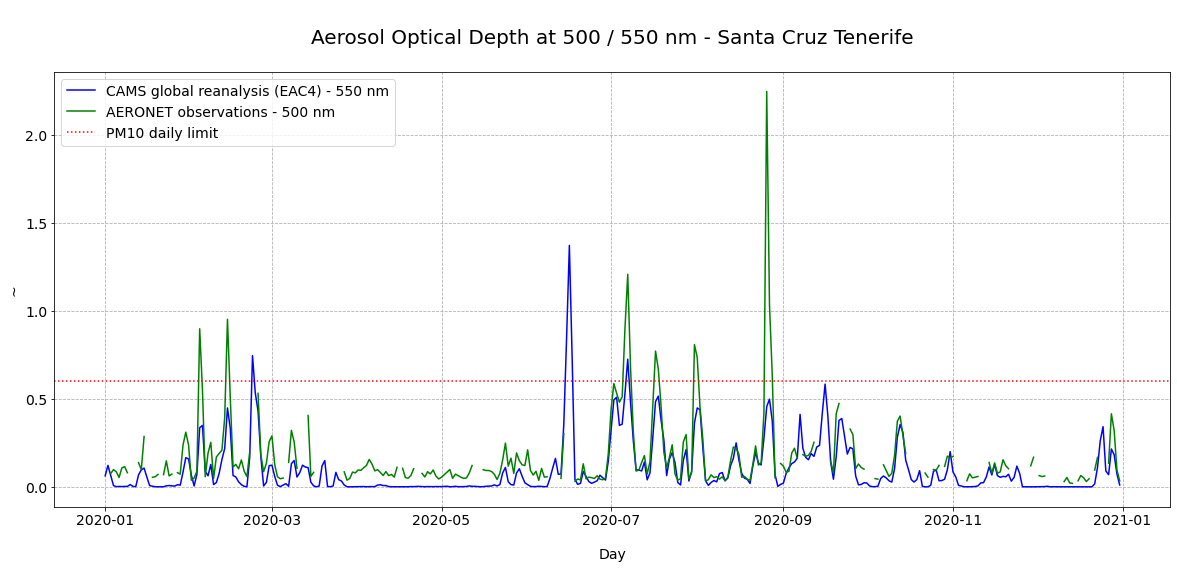

In [32]:
# Initiate a figure
fig = plt.figure(figsize=(20,8))
ax = plt.subplot()

# Define the plotting function
ax.plot(df_combined.duaod550, '-', color='blue', label='CAMS global reanalysis (EAC4) - 550 nm')
ax.plot(df_combined.AOD_500nm, '-', color='green', label='AERONET observations - 500 nm')

plt.axhline(y=0.6, color='r', linestyle='dotted', label='PM10 daily limit')

# Customize the title and axes lables
ax.set_title('\nAerosol Optical Depth at 500 / 550 nm - Santa Cruz Tenerife\n', fontsize=20)
ax.set_ylabel(cams_ts.units, fontsize=14)
ax.set_xlabel('\nDay', fontsize=14)

# Customize the fontsize of the axes tickes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add a gridline to the plot
ax.grid(linestyle='--')

plt.legend(fontsize=14, loc=2)


**INFERENCE**
* As you can see in the plot above that the model and the AERONET observations follow a similar annual cycle of AOD in 2020 for the Santa Cruz station in Tenerife. 

* You also see that for higher AOD values measured by AERONET, the CAMS model mostly underpredicts the AOD intensity.